## <center> A LangChain Agent Example using an Experimental Python Agent </center> 

* **Agents** are a new, experimental tool in **LangChain**.
* They are similar to **Chains**, where a larger task is broken smaller tasks, each of which is executed by a Chain which takes in an input and returns an output to go to another Chain, to achieve the larger task.
    * This approach delivers better results than implementing the larger task in a single step.
* Agents much like Chains take a set of **tools**, similar to chains, needed to perform a task as well as an **LLM**.
    * The difference though is that **the Agent uses it's LLM to decide which tool to use next**. 
        * It does this by reading the **request** as well as **each available tool's description**, and decides which tool to use next to perform the task.
        * At every step the Agent uses the LLM to look at the **output** and the **request**, to decide which tool to use next or if the task is finished. 
        * This is called the **ReACT** framework where an LLM **Reasons**, then **Acts**, **observes** the output, **Reasons**, then **Acts**, until it decides that task is completed.

* In the example below I thought I try an experimental **Python Agent**, that uses the **PythonPerlTool**.
    * This tool alllows you to **run Python code in a REPL (read-eval-print) loop**, like the one Agents do.
    * I tried to give it a bit of a small challenge to create the graph that shows that the ratio of Fibbonacci numbers sequence, creates a new sequence that converges to the golden ratio ${\displaystyle \varphi=}1.618$
    * I set the Agent's **`verbose`** parameter to true, to see it's internal "thinking" by using the LLM, at each step.
    * The output is with the new `gpt-4-turbo` model. 
        * With `gpt-3.5-turbo` it would divide by zero and have to reason a couple of time what to do to get out of that error.
* **WARNING: This will write and execute any code that you ask it, so use caustion!!!**
    * For example you could delete files on your computer by accident.

In [3]:
from langchain.agents import load_tools, initialize_agent, AgentType
from langchain_experimental.tools.python.tool import PythonREPLTool
from langchain.python import PythonREPL
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain.chat_models import ChatOpenAI

In [4]:
llm = ChatOpenAI(temperature=0, model='gpt-4-1106-preview')

In [5]:
python_agent = create_python_agent(tool=PythonREPLTool(), 
                                   llm = llm,
                                   agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                                   handle_parsing_errors=True,
                                   verbose=True)



> Entering new AgentExecutor chain...
To create a line chart of the ratio of each Fibonacci number to the previous one, I will first need to generate the first twenty numbers in the Fibonacci sequence. Then, I will calculate the ratios and finally plot these ratios using a plotting library such as matplotlib. Let's start by generating the Fibonacci sequence.

Action: Python_REPL
Action Input: 
```python
def fibonacci(n):
    fib_sequence = [0, 1]
    for i in range(2, n):
        fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])
    return fib_sequence

fib_sequence = fibonacci(20)
print(fib_sequence)
```
Observation: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]

Thought:Now that I have the Fibonacci sequence, I need to calculate the ratios of each number to the previous one, excluding the first number since it has no previous number. Then I will plot these ratios using matplotlib.

Action: Python_REPL
Action Input:
```python
ratios = [f

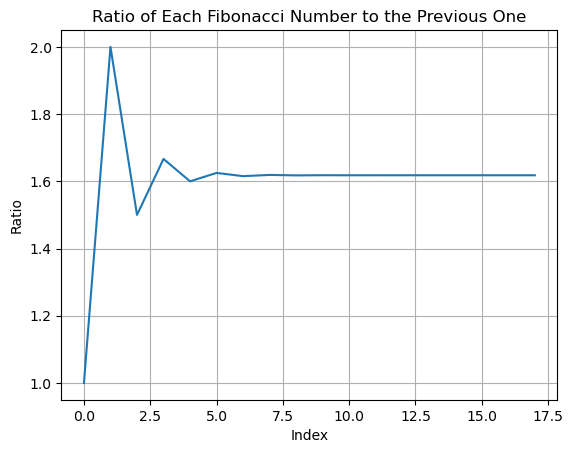

I have the ratios of each Fibonacci number to the previous one. Now I will use matplotlib to create a line chart of these ratios.

Action: Python_REPL
Action Input:
```python
import matplotlib.pyplot as plt

plt.plot(ratios)
plt.title('Ratio of Each Fibonacci Number to the Previous One')
plt.xlabel('Index')
plt.ylabel('Ratio')
plt.grid(True)
plt.show()
```
Observation: 
Thought:

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `I don't know`

In [7]:
python_agent.run(''' Create a line chart of the ratio of each Fibbonacci number to the previous one, using the Fibbonacci the first twienty numbers in the sequence. ''')